<h1 style='color: green; font-size: 36px; font-weight: bold;'>Housing - Regressão Linear</h1>
//
Thomas Bekhor, João Bresser e Marcos Paulo _

## Importando bibliotecas


In [13]:
%matplotlib inline
from pprint import pprint

import pandas as pd

import matplotlib.pyplot as  plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer




In [14]:
import geopandas

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

In [15]:
RAND_SEED = 42
np.random.seed(RAND_SEED)


In [51]:
df_house = pd.read_csv("DATA1_housing.csv")
#observando a média de população para cada bloco
df_house["population"].mean()


1425.4767441860465

## O Dataset e o Projeto
<hr>


### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O dataset é o conjunto de dados de imóveis da Califórnia, que contém dados extraídos do censo de 1990 dos EUA. Nesta amostra, um grupo de blocos, em média, possui 1.425,5 indivíduos que vivem em uma área geograficamente compacta. Naturalmente, a área geográfica incluída varia de maneira inversa à densidade da população. Calculamos as distâncias entre os centroides de cada grupo de blocos, conforme medido em latitude e longitude. Excluímos todos os grupos de blocos que não registram entradas para as variáveis independentes e dependentes. Os dados finais contêm 20.640 observações sobre nove características. </p>

### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>longitude (ponto flutuante 64)</b> - Uma medida do oeste de uma casa. Um valor mais negativo está mais a oeste. </li>
    <li><b>latitude (ponto flutuante 64)</b> - Uma medida do norte mais alto de uma casa; um valor maior é mais ao norte. </li>
    <li><b>housing_median_age (ponto flutuante 64)</b> - Idade mediana de uma casa em um bloco; residências novas que ainda não têm moradores, diminuem o valor dessa variável. </li>
    <li><b>total_rooms (ponto flutuante 64)</b> - Número total de salas em um bloco. </li>
    <li><b>total_bedrooms (ponto flutuante 64)</b> - Número total de quartos em um bloco. </li>
    <li><b>population (ponto flutuante 64)</b> - Número total de pessoas que residem em um bloco. </li>
    <li><b>households (ponto flutuante 64)</b> - Número total de unidade residencial para cada bloco. </li>
    <li><b>median_income (ponto flutuante 64)</b> - Renda mediana para famílias em um bloco de casa, medido em dezenas de milhares de dólares americanos. </li>
    <li><b>median_house_value (ponto flutuante 64)</b> - Valor mediano da casa para casas em um bloco, medido em dólares.</li>
    <li><b>ocean_proximity (object)</b> - Proximidade do oceano. </li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. No final do projeto teremos um modelo de previsão para o valor mediano de uma casa na região segundo os inputs de um conjunto de variáveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>


In [17]:
df_house.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


visualizando informacoes


In [18]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [19]:
df_house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df_house.isnull().values.any()

True

Onde estao os Nan?

In [29]:
#quantos Nan tem no dataframe
df_house.isnull().sum().sum()

207

In [37]:
#verificando quantos Nan tem no total_bedrooms
df_house["total_bedrooms"].isnull().sum().sum()
#verificando quantos % dos valores sao Nan?
df_house["total_bedrooms"].isnull().sum().sum()/df_house["total_bedrooms"].shape[0]
#é somente 1 por cento dos valores



0.01002906976744186

portanto, todos estao nos total_bedroom, oque fazer com os Nan?

In [68]:
#quais valores mais correlacionados com o numero total de quartos?
df_house.corr()["total_bedrooms"]




longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64

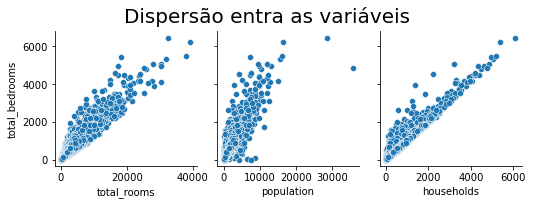

In [42]:
ax=sns.pairplot(df_house,y_vars='total_bedrooms', x_vars=["total_rooms", "population",	"households"])
ax.fig.suptitle('Dispersão entra as variáveis', fontsize=20, y=1.1)
ax

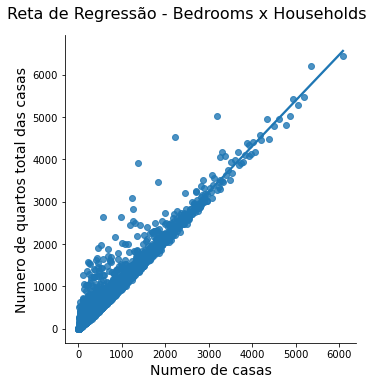

In [57]:
#o numero de casas em um bloco está diretamente relacioando com o numero de quartos totais do bloco, portanto para preencher os vallres nan será feita uma interpolacao.

ax=sns.lmplot(x='households',y='total_bedrooms',data=df_house)
ax.fig.suptitle('Reta de Regressão - Bedrooms x Households', fontsize=16,y=1.05)
ax.set_xlabels('Numero de casas', fontsize=14)
ax.set_ylabels('Numero de quartos total das casas', fontsize=14)
ax



In [95]:
df_house["total_bedrooms"].isnull()
#df2=df_house.loc[:,["total_bedrooms"]]
#df2
#df2.isnull().sum().sum()
#df2 = df2.fillna(df2.interpolate, axis=1
#df2

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [103]:
df2=df_house.loc[:,["total_bedrooms","households"]]

df2.fillna(df2.interpolate, axis=1)
df2.isnull().sum()
df2


,total_bedrooms,households
0,129.0,126.0
1,1106.0,1138.0
2,190.0,177.0
3,235.0,219.0
4,280.0,259.0
...,...,...
20635,374.0,330.0
20636,150.0,114.0
20637,485.0,433.0
20638,409.0,349.0


/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: float() argument must be a string or a number, not 'method'

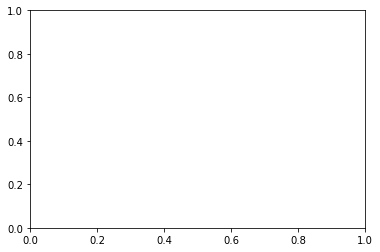

In [74]:
ax=sns.distplot(df2['total_bedrooms'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('total_bedrooms', fontsize=16)
ax

/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='total_bedrooms', ylabel='total_bedrooms'>

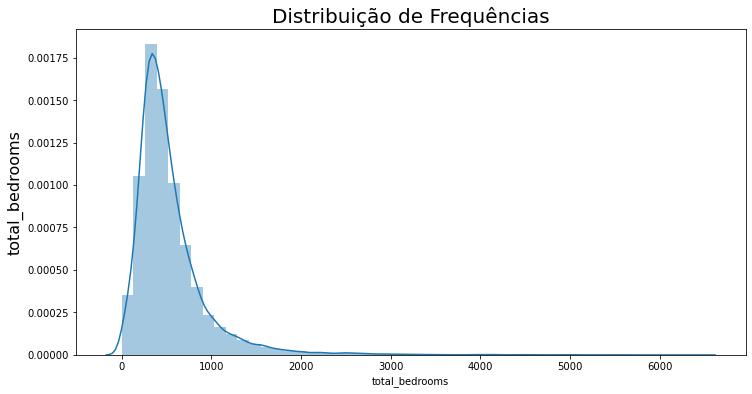

In [56]:
ax=sns.distplot(df_house['total_bedrooms'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('total_bedrooms', fontsize=16)
ax

In [24]:
df_house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
df_house["total_bedrooms"].value_counts

<bound method IndexOpsMixin.value_counts of 0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64>

In [ ]:
#subsituindo todos Nan por 0
df_house=df_house.replace(np.nan, 0)

In [ ]:
#quantos Nan tem no dataframe
df_house.isnull().sum().sum()

0

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 2.1 MB


In [23]:
df_house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
abs(df_house.corr()["median_house_value"].sort_values(ascending=False).drop("median_house_value"))

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049148
population            0.024650
longitude             0.045967
latitude              0.144160
Name: median_house_value, dtype: float64

In [ ]:
df_house

Em valores absolutos os

<AxesSubplot:title={'center':'median house value'}, ylabel='median_house_value'>

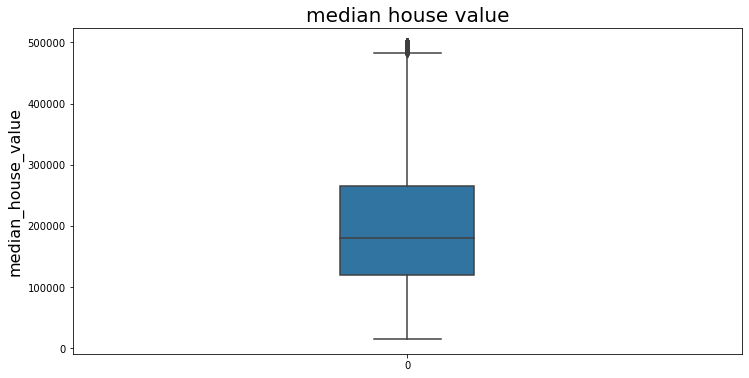

In [25]:
import seaborn as sns
ax=sns.boxplot(data=df_house['median_house_value'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('median house value', fontsize=20)
ax.set_ylabel('median_house_value', fontsize=16)
ax

/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='median_house_value', ylabel='median_house_value'>

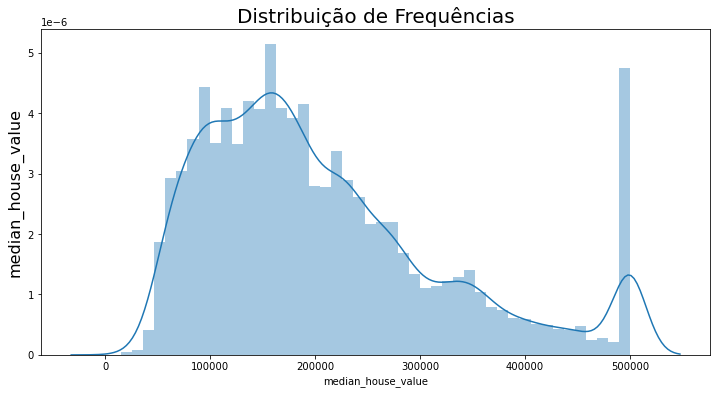

In [26]:
ax=sns.distplot(df_house['median_house_value'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('median_house_value', fontsize=16)
ax

/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='median_income', ylabel='median_house_value'>

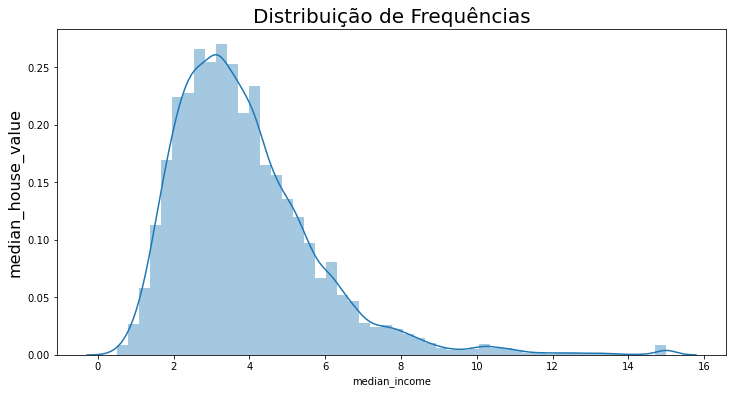

In [27]:
ax=sns.distplot(df_house['median_income'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('median_house_value', fontsize=16)
ax

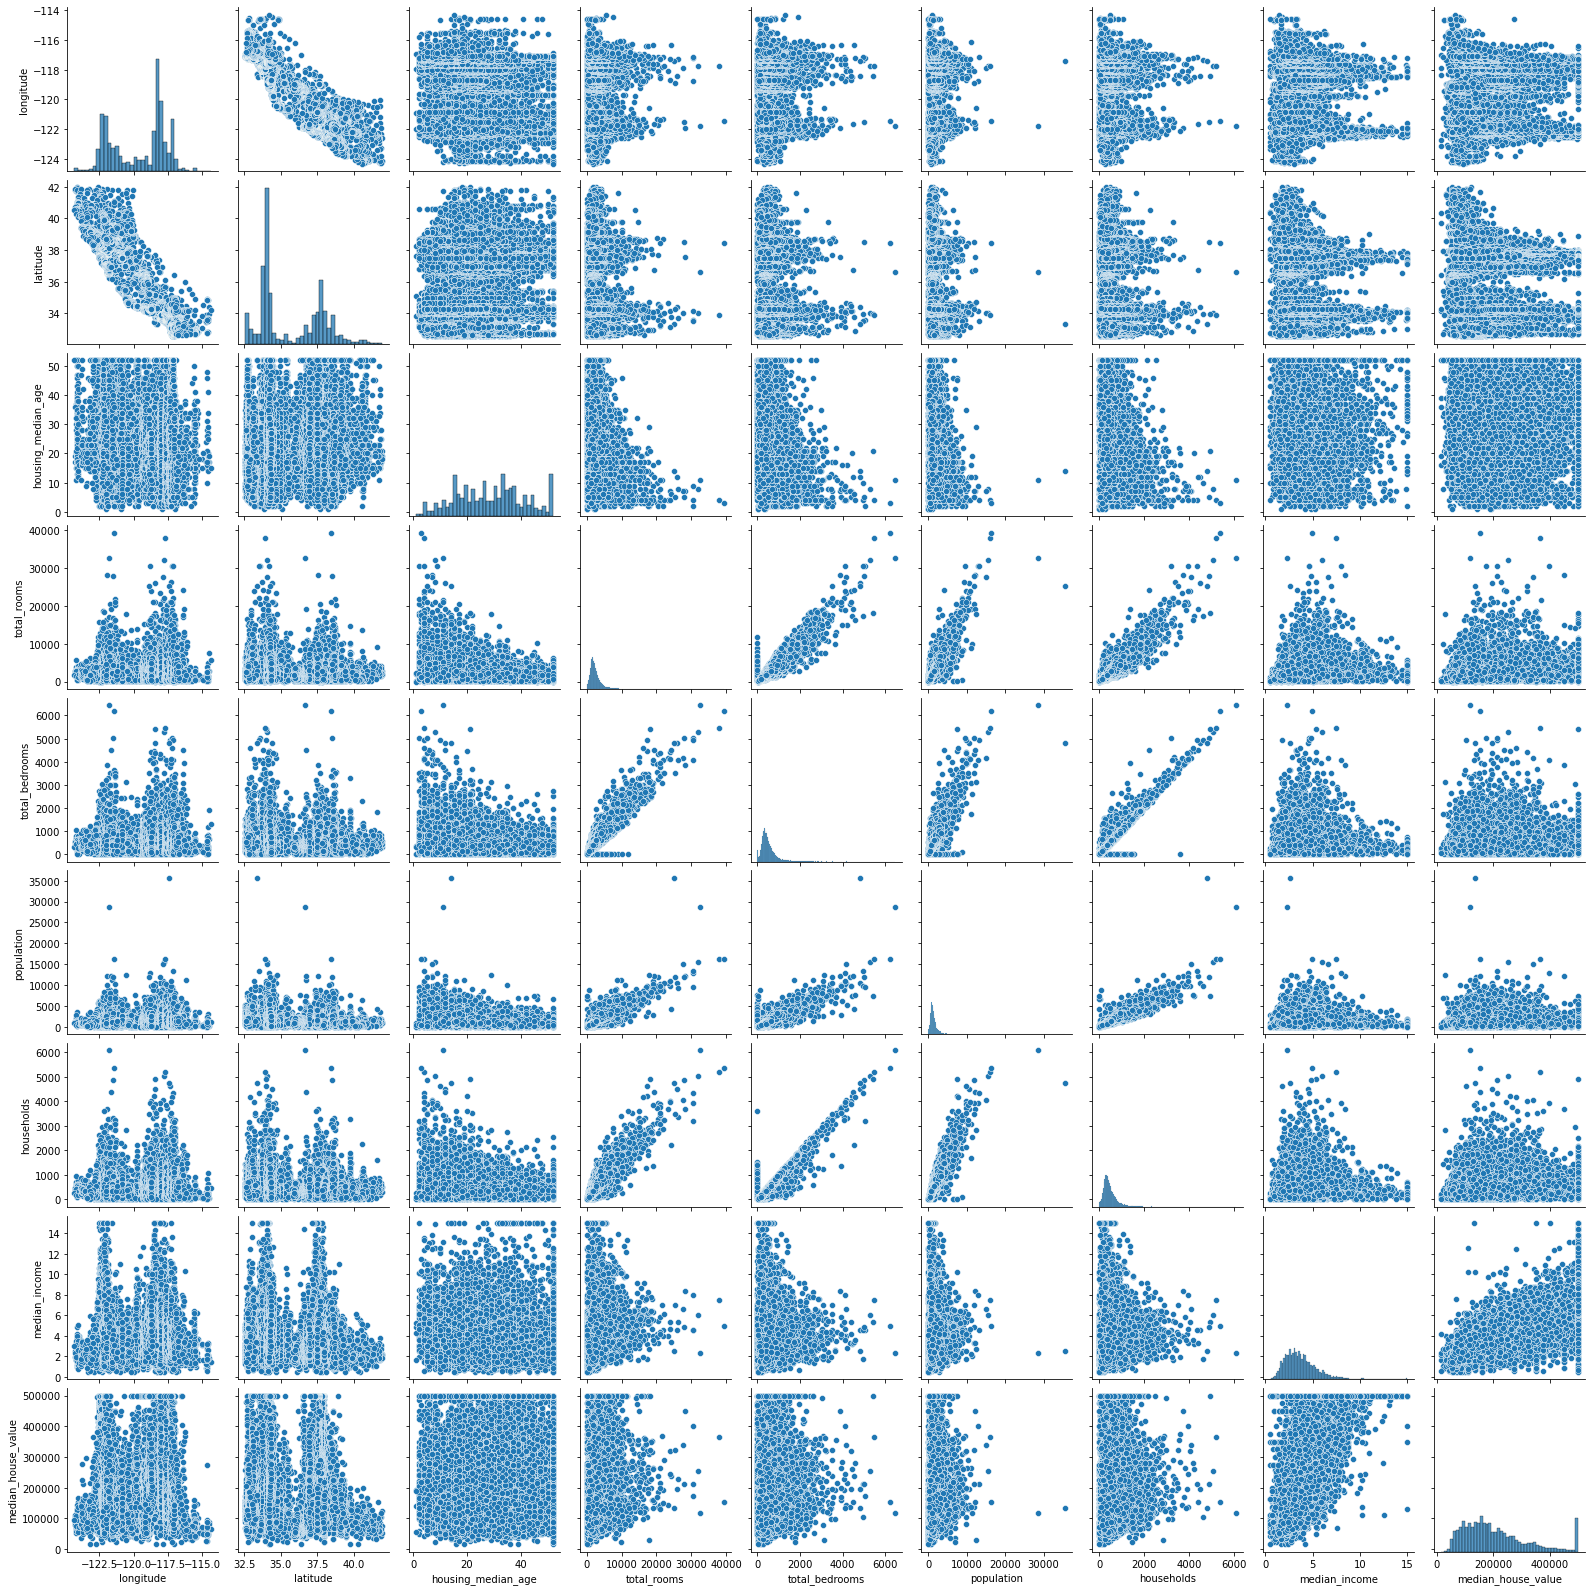

In [ ]:
ax=sns.pairplot(df_house)

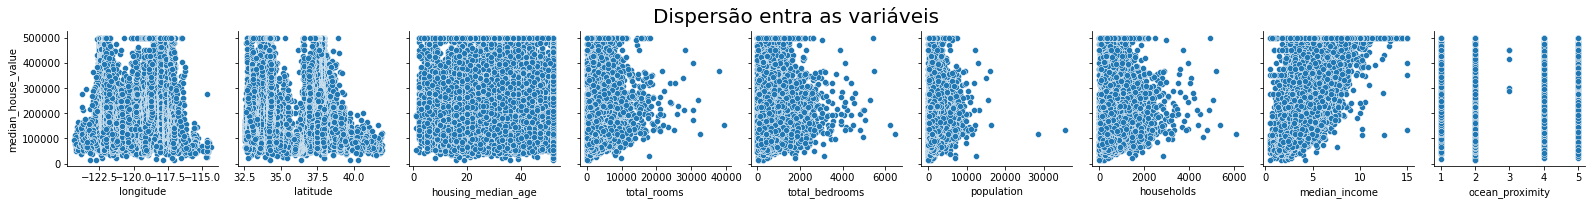

In [ ]:
ax=sns.pairplot(df_house,y_vars='median_house_value', x_vars=["longitude"	,"latitude"	,"housing_median_age",	"total_rooms"	,"total_bedrooms","population",	"households"	,"median_income"	,	"ocean_proximity"])
ax.fig.suptitle('Dispersão entra as variáveis', fontsize=20, y=1.1)
ax

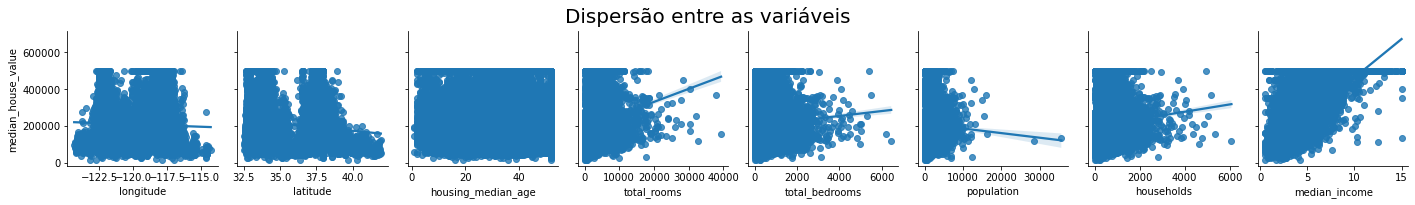

In [ ]:
ax=sns.pairplot(df_house,y_vars='median_house_value',x_vars=["longitude"	,"latitude"	,"housing_median_age",	"total_rooms"	,"total_bedrooms","population",	"households"	,"median_income"	], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)
ax

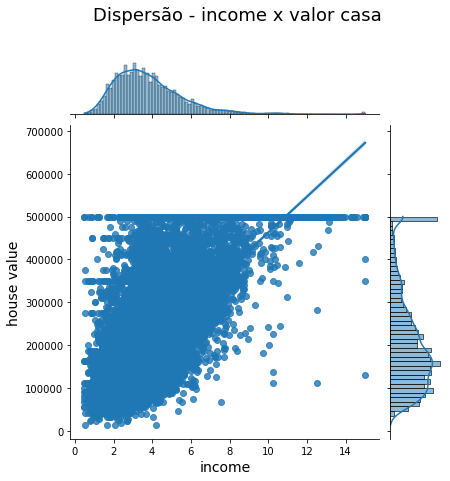

In [ ]:
ax=sns.jointplot(x='median_income',y='median_house_value',data=df_house, kind='reg')
ax.fig.suptitle('Dispersão - income x valor casa', fontsize=18, y=1.1)
ax.set_axis_labels('income', 'house value', fontsize=14)
ax

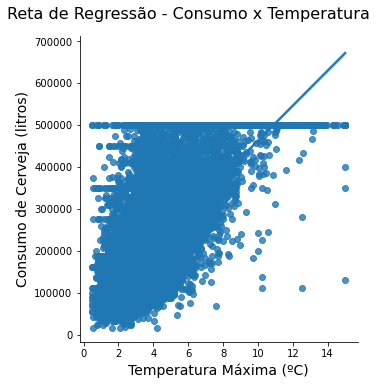

In [ ]:
ax=sns.lmplot(x='median_income',y='median_house_value',data=df_house)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize=16,y=1.05)
ax.set_xlabels('Temperatura Máxima (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax

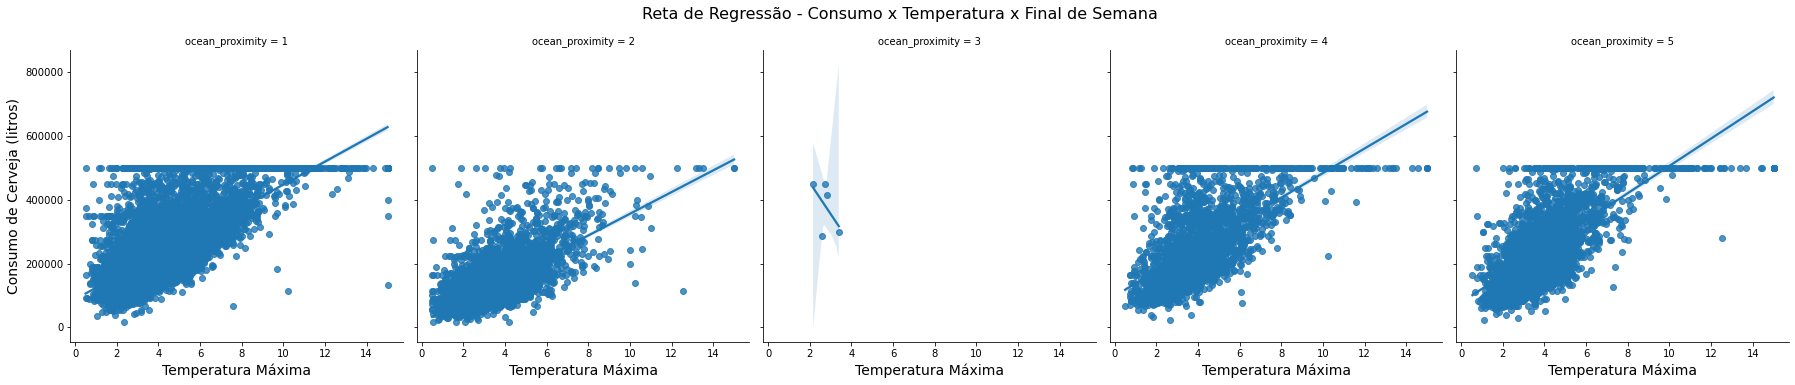

In [ ]:
ax=sns.lmplot(x='median_income',y='median_house_value',data=df_house,col='ocean_proximity')
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura x Final de Semana',fontsize=16,y=1.05)
ax.set_xlabels('Temperatura Máxima', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax

# Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
y=df_house['median_house_value']

In [ ]:
x=df_house[["longitude"	,"latitude"	,"housing_median_age",	"total_rooms"	,"total_bedrooms","population",	"households"	,"median_income"	]]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=RAND_SEED)

In [ ]:
x_train.shape

(14448, 8)

In [ ]:
x_test.shape

(6192, 8)

In [ ]:
x_train.shape[0]+x_test.shape[0]

20640

In [ ]:
modelo=LinearRegression()

In [ ]:
modelo.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(f'R2={modelo.score(x_train,y_train).round(2)}')


R2=0.64


In [ ]:
y_previsto=modelo.predict(x_test)

In [ ]:
print(f'R2={metrics.r2_score(y_test,y_previsto).round(2)}')

R2=0.62


In [ ]:
entrada=x_test[1:2]
entrada


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313


In [ ]:
modelo.predict(entrada)[0]

101843.19122293591

In [ ]:
longitude=120
latitude=30
house_median_age=25
total_rooms=300
total_bedrooms
entrada=[[temp_max,chuva,fds]]

print(f'{modelo.predict(entrada)[0]:.2f} dolares')

ate aqui

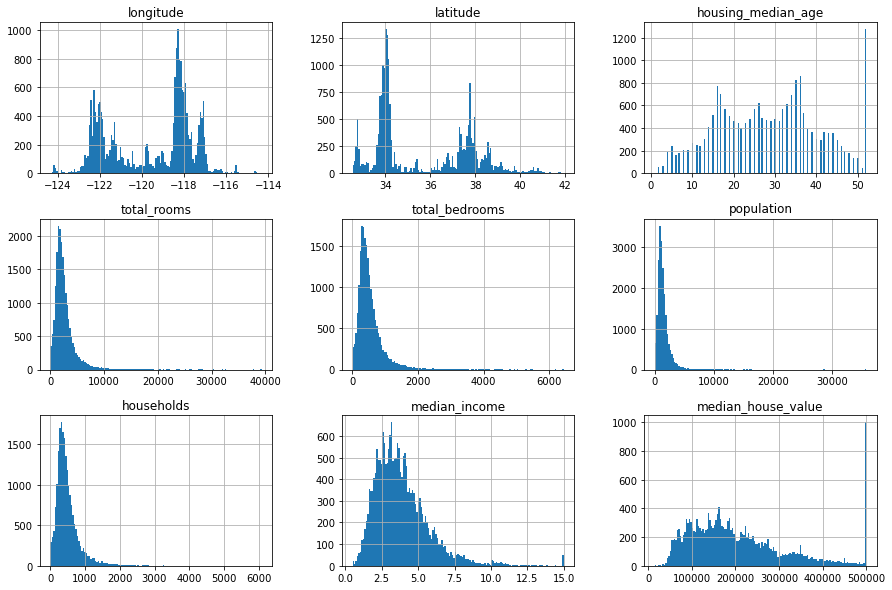

In [ ]:
BINS= int(np.sqrt(len(df_house.index)))

df_house.hist(bins=BINS,figsize=(15,10));



Feature mais correlacionada: median_income

Text(0, 0.5, 'median_income')

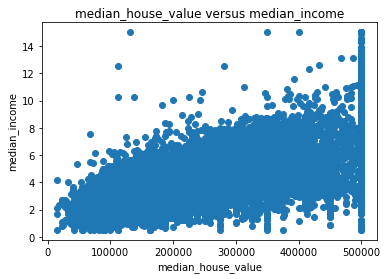

In [ ]:
plt.scatter(df["median_house_value"],df["median_income"])
plt.title('median_house_value versus median_income')
plt.xlabel('median_house_value')
plt.ylabel('median_income')

# Análise

# Manipulação de Dados

# Separação Treino e Teste

# Aplicando Modelos